# ME Assignment
1. Implement the EM algorithm for clustering with multivariate Gaussian models
discussed in the LearningGM section. Initialize the algorithm with the K-means result
(for example Matlab provides a kmeans function). Assume there are only two clusters.
Report the parameters $\pi_k$, $\mu_k$, $\Sigma_k$, $k = 1, 2$ for the following datasets containing
$500-600$ observations from $\mathbb{R}^2$:



#### Import dependencies

In [105]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from os.path import join
from scipy.stats import multivariate_normal
from itertools import repeat

#### Data loading functions

In [106]:
def get_xeasy():
    return load_data("xeasy.txt")

def get_x1():
    return load_data("x1.txt")

def get_x2():
    return load_data("x2.txt")

def load_data(filename):
    path = "data/EM/"
    data = np.loadtxt(join(path,filename), delimiter=',')
    return data


#### EM Algorithm

In [107]:
def EM(data):
    num_clusters = 2   #number of clusters

    #use kmeans to initialize cluster centers
    kmeans = KMeans(n_clusters=num_clusters)
    prediction_labels = np.asarray(kmeans.fit_predict(data))
    cluster_centroids = np.asarray(kmeans.cluster_centers_)
    cluster_variances = np.asarray([np.sum(np.square(data[prediction_labels==k]))/(prediction_labels.size-1)
                         for k in range(num_clusters)])
    mixture_proportions = np.asarray([np.sum(prediction_labels==k)/prediction_labels.size for k in range(num_clusters)])


    converged = False
    counter = 0
    ll_list = []
    while not converged:
        counter += 1
        if counter == 10000:
            print(counter)
            break

        # expectation step
        prediction_labels = expectation_step(data, cluster_centroids, cluster_variances, mixture_proportions)

        # maximization step
        new_cluster_centroids, new_cluster_variances, new_mixture_proportions = \
            maximization_step(data, prediction_labels, cluster_centroids, num_clusters)

        # check if converged
        if(np.allclose(new_cluster_centroids, cluster_centroids) and
           np.allclose(new_cluster_variances, cluster_variances) and
           np.allclose(new_mixture_proportions, mixture_proportions)):
            converged = True
            print(counter)

        # update parameters
        cluster_centroids = new_cluster_centroids
        cluster_variances = new_cluster_variances
        mixture_proportions = new_mixture_proportions

        ll = -np.sum(np.log(np.sum(list(map(pdf, repeat(data), cluster_centroids, cluster_variances, mixture_proportions)),axis=0)))
        ll_list.append(ll)

    plot_clusters(data, prediction_labels)

    print(cluster_centroids)
    print(cluster_variances)
    print(mixture_proportions)
    plt.plot(ll_list)
    plt.show()
    # Print total log likelihood
    print(ll)
    #test = np.log(np.sum(list(map(pdf, cluster_centroids, cluster_variances, mixture_proportions)),axis=0))
    #print(test.shape)

def pdf(data, centroid, variance, proportion):
    return multivariate_normal.pdf(data, centroid, variance)*proportion

def expectation_step(data, cluster_centroids, cluster_variances, mixture_proportions):
    denominator = np.sum(np.asarray(list(map(pdf, repeat(data), cluster_centroids, cluster_variances, mixture_proportions))), axis=0)
    prediction_labels=[pdf(data, centroid, variance, proportion)/denominator for centroid, variance, proportion in
                       zip(cluster_centroids, cluster_variances, mixture_proportions)]
    return np.asarray(prediction_labels).T

def maximization_step(data, prediction_labels, cluster_centroids, num_clusters):
    new_cluster_centroids = np.asarray([np.average(data, weights=prediction_labels[:,k], axis=0) for k in range(num_clusters)])
    new_mixture_proportions = np.asarray([np.mean(prediction_labels[:,k]) for k in range(num_clusters)])
    new_cluster_variances = np.asarray([prediction_labels[:,k]*(data-cluster_centroids[k]).T@(data-cluster_centroids[k])/np.sum(prediction_labels[:,k])
                     for k in range(num_clusters)])
    return new_cluster_centroids, new_cluster_variances, new_mixture_proportions

def plot_clusters(data, prediction_labels):
    # Show scatterplot with labels
    for prediction in prediction_labels.T:
        group = data[prediction >= .5]
        plt.scatter(group[:,0], group[:,1])
    plt.show()


## 1a. xeasy


23
[[ 3.01886079 -0.17711201]
 [ 0.02847698  3.07051184]]
[[[ 1.00528737  0.16007202]
  [ 0.16007202  0.94210842]]

 [[ 1.01849521 -0.05861085]
  [-0.05861085  0.95457513]]]
[0.59115761 0.40884239]
1726.9252825416424


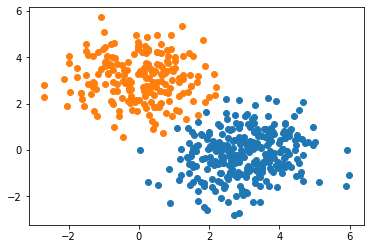

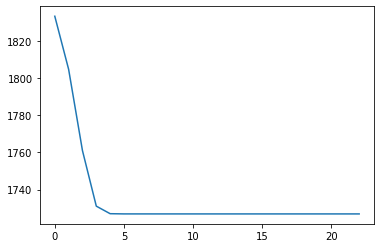

In [108]:
EM(get_xeasy())

201
[[-0.10044353  1.9731472 ]
 [ 2.08440627  0.12438087]]
[[[ 1.70416742  0.14864848]
  [ 0.14864848  2.1999043 ]]

 [[ 0.86255357 -0.03892035]
  [-0.03892035  1.0582789 ]]]
[0.65274152 0.34725848]
2197.678724172389


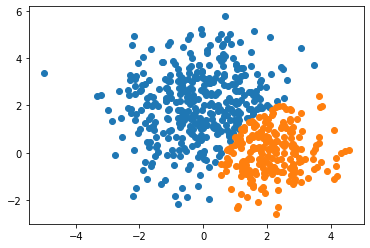

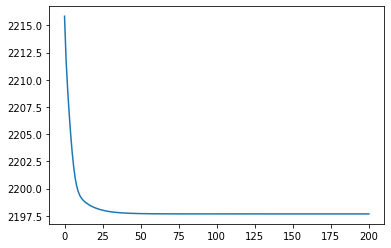

In [109]:
EM(get_x1())

91
[[ 0.17809451 -0.12519429]
 [ 0.01424412 -0.04651444]]
[[[9.25806322 0.76781936]
  [0.76781936 9.41427379]]

 [[1.06250563 0.06633618]
  [0.06633618 0.88826237]]]
[0.48803565 0.51196435]
2548.637701870456


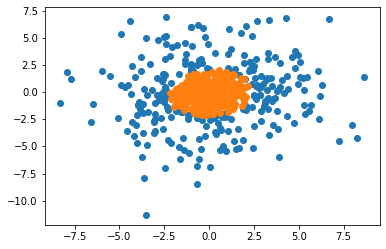

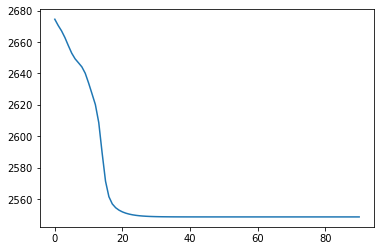

In [110]:
EM(get_x2())